# Clustering Text Documents

## Load/Prepare the Dataset

In [2]:
import pandas as pd


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('/content/paper_dataset.txt', delimiter='\t')

Saving paper_dataset.txt to paper_dataset.txt


In [3]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   paper_id                                    venue  \
0  80F270EA  International Conference on Data Mining   
1  7FD4A7A0  International Conference on Data Mining   
2  7FCBA1EA  International Conference on Data Mining   
3  802D3584  International Conference on Data Mining   
4  7D0D1971  International Conference on Data Mining   

                                             authors  year  \
0  beng chin ooi + nick koudas + suresh venkatasu...  2006   
1                        george karypis + nikil wale  2006   
2    s asharaf + m narasimha murty + shirish shevade  2006   
3  art munson + alexandru niculescumizil + rich c...  2006   
4  qiang yang + shuicheng yan + benyu zhang + jun...  2006   

                                               title  \
0       Rapid Identification of Column Heterogeneity   
1  Comparison of Descriptor Spaces for Chemical C...   
2                  Cluster Based Core Vector Machine   
3         Getting the Most Out of Ensemble Select

In [4]:
# Combine Relevant Columns

df['text'] = df['title'].fillna('') + ' ' + df['index_keys'].fillna('') + ' ' + df['abstract'].fillna('')
df = df[['text']]

print("Combined Text Data Preview:")
print(df['text'].head())

Combined Text Data Preview:
0    Rapid Identification of Column Heterogeneity d...
1    Comparison of Descriptor Spaces for Chemical C...
2    Cluster Based Core Vector Machine pattern clas...
3    Getting the Most Out of Ensemble Selection hil...
4    A Novel Scalable Algorithm for Supervised Subs...
Name: text, dtype: object


**To understand the dataset, we need to view its structure before starting to process it. A dataset contains multiple columns: Paper ID, venue, Authors, Year, Title, Index Keys, Author Keys, and Abstract.**

**Combining relevant columns into a single (text) column and filling NaN values with empty strings to optimize the clustering process.**

## Text Preprocessing

In [5]:
!pip install nltk scikit-learn

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# function for preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    tokens = text.split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the text
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display a preview of the cleaned text
print("Cleaned Text Data Preview:")
print(df['cleaned_text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Cleaned Text Data Preview:
0    rapid identification column heterogeneity data...
1    comparison descriptor space chemical compound ...
2    cluster based core vector machine pattern clas...
3    getting ensemble selection hill climbing arbit...
4    novel scalable algorithm supervised subspace l...
Name: cleaned_text, dtype: object


**Text Preprocessing:
1- Lowercase the text: To reduce the complexity of the dataset and ensure text uniformity, we need to convert all text to lowercase.
2- Remove special characters and numbers: Such as punctuation marks, symbols, whitespace characters, numbers, etc. that are often irrelevant for text analysis. To make it easier to do analysis.
3- Tokenization: split the text into tokens, to analyze and manipulate the text.
4-  Remove stopwords: To reduce noise in the data. We remove not necessary words like and, the, etc.
5- Lemmatization: Different forms of a word into a single representation like running → run, better → good. To enhance the quality and accuracy of text analysis.**

## Text Vectorization

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Apply TF-IDF to transform the text data into feature vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Displaying the shape and preview of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_df.shape)
print("TF-IDF Matrix Preview:")
print(tfidf_df.head())


TF-IDF Matrix Shape: (635, 1000)
TF-IDF Matrix Preview:
   able  access  according   account  accuracy  accurate  achieve  achieved  \
0   0.0     0.0        0.0  0.000000  0.048474       0.0      0.0       0.0   
1   0.0     0.0        0.0  0.042196  0.000000       0.0      0.0       0.0   
2   0.0     0.0        0.0  0.000000  0.000000       0.0      0.0       0.0   
3   0.0     0.0        0.0  0.000000  0.000000       0.0      0.0       0.0   
4   0.0     0.0        0.0  0.000000  0.000000       0.0      0.0       0.0   

   achieves  across  ...    within  without  word  work     world  would  xml  \
0       0.0     0.0  ...  0.000000      0.0   0.0   0.0  0.000000    0.0  0.0   
1       0.0     0.0  ...  0.000000      0.0   0.0   0.0  0.000000    0.0  0.0   
2       0.0     0.0  ...  0.067369      0.0   0.0   0.0  0.070762    0.0  0.0   
3       0.0     0.0  ...  0.000000      0.0   0.0   0.0  0.000000    0.0  0.0   
4       0.0     0.0  ...  0.000000      0.0   0.0   0.0  0.00000

**TF-IDF Matrix Shape: (635, 1000), we have 635 documents in rows, and it usually uses 1000 terms in columns to reduce dimensionality with the important words. some of the terms (able - access - according -  account).**

**Applied TF-IDF to transform the text data into feature vectors, Where unique and important terms within the document have a high TF-IDF value.**

**Converting the TF-IDF matrix to a DataFrame, For easy reading and understanding of the data representation.**

**Preview of Term Importance: We see a few rows with TF-IDF scores for the terms across different documents. For example, in Document 2, the term (world) has a (0.070762 ) TF-IDF score, which means it’s important in Document 1. Terms with a 0.00 TF-IDF score do not appear in that document, or their occurrence is minimal.**

## Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA

# 2D visualization
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_df)

# Check the shape of the reduced data
print("PCA Transformed Shape:", tfidf_pca.shape)

PCA Transformed Shape: (635, 2)


**PCA: To identify the principal components in which the data varies the most in 2D, where each document is described by two principal components. For easier analysis.**

## Clustering the Documents

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the PCA-transformed data to improve clustering performance
tfidf_pca_std = StandardScaler().fit_transform(tfidf_pca)

# Set the DBSCAN parameters
eps = 0.5  # Maximum distance between two samples
min_samples = 5  # Minimum number of samples in a neighborhood

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(tfidf_pca_std)

# Add cluster labels to your DataFrame
df['cluster'] = cluster_labels

# Display the first few rows with cluster labels
print(df[['cleaned_text', 'cluster']].head())

# Count the number of clusters and noise points
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


                                        cleaned_text  cluster
0  rapid identification column heterogeneity data...        0
1  comparison descriptor space chemical compound ...        0
2  cluster based core vector machine pattern clas...        0
3  getting ensemble selection hill climbing arbit...        0
4  novel scalable algorithm supervised subspace l...        0
Estimated number of clusters: 2
Estimated number of noise points: 14


In [10]:
# Check the distribution of documents across clusters
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

# Preview sample documents from Cluster 0
print("Sample Documents from Cluster 0:")
print(df[df['cluster'] == 0]['cleaned_text'].head(5))

# Preview sample documents from Cluster 1
print("\nSample Documents from Cluster 1:")
print(df[df['cluster'] == 1]['cleaned_text'].head(5))

cluster
 0    606
 1     15
-1     14
Name: count, dtype: int64
Sample Documents from Cluster 0:
0    rapid identification column heterogeneity data...
1    comparison descriptor space chemical compound ...
2    cluster based core vector machine pattern clas...
3    getting ensemble selection hill climbing arbit...
4    novel scalable algorithm supervised subspace l...
Name: cleaned_text, dtype: object

Sample Documents from Cluster 1:
39     maxmin approach hiding frequent itemsets assoc...
76     searching pattern rule pattern rule data minin...
88     identifying followcorrelation itemsetpairs ass...
104    multitier granule mining representation multid...
150    association rule mining chisquared test using ...
Name: cleaned_text, dtype: object


**DBSCAN clustering algorithm:
Handles Noise: This is useful in text data.
Arbitrary Cluster Shapes: Good for document topics because they have differences in their structure and density.
Automatic Determination of Clusters.**

**DBSCAN parameters:
Epsilon: 0.5 random value may work well for various datasets.
Number of samples in a neighborhood: 5  samples in a neighborhood may be enough.**

**Clustering results:
Two main clusters within the dataset. Cluster 0= 606 documents, indicating that it may be content a common theme prevalent in the dataset. Cluster 1= 15 documents, that could represent a specific area of research. and 14 noise documents that do not fit well into either cluster.**



## Plot Clusters

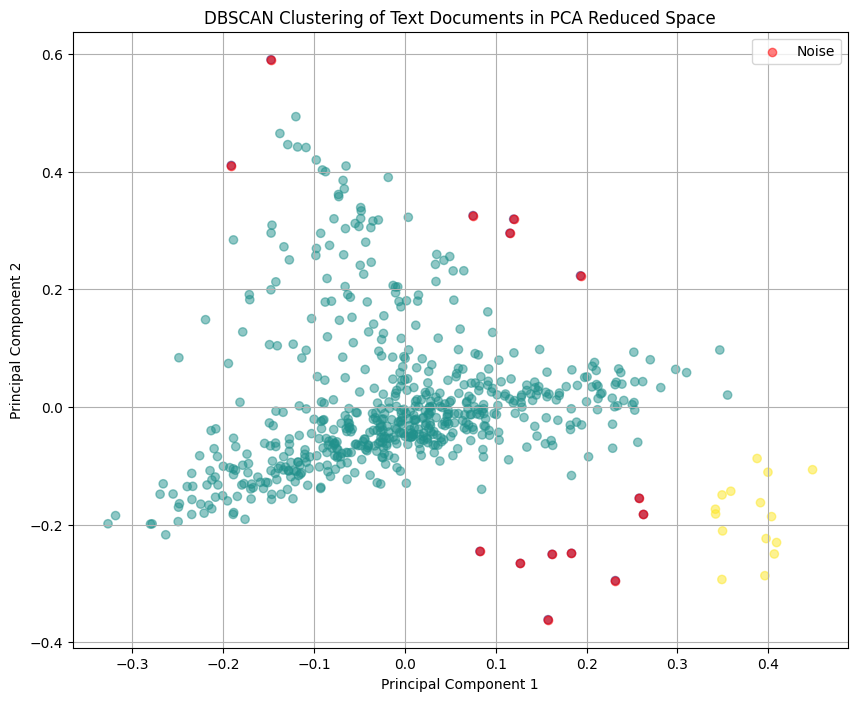

In [11]:
import matplotlib.pyplot as plt

# Create a scatter plot of the clustered data
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)

# Highlight noise points in red
plt.scatter(tfidf_pca[df['cluster'] == -1, 0], tfidf_pca[df['cluster'] == -1, 1], c='red', label='Noise', alpha=0.5)

# Add titles and labels
plt.title('DBSCAN Clustering of Text Documents in PCA Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

# Show plot
plt.show()


**Scatter Plot: Each point represents a document, colored according to its assigned cluster. The noise points are highlighted in red.**

## Word Cloud Visualization

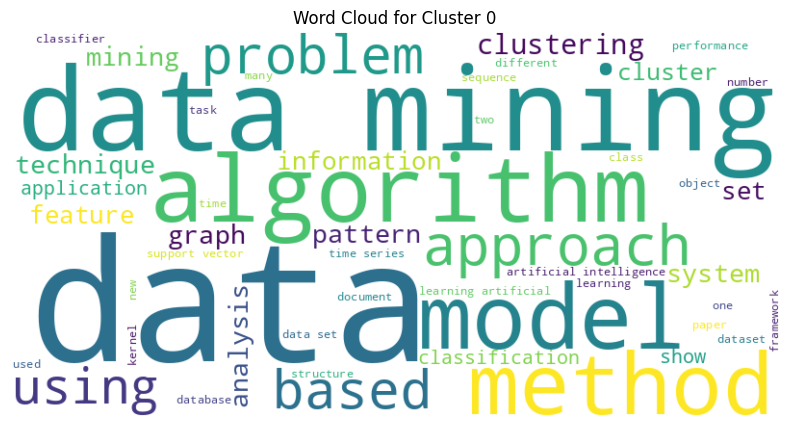

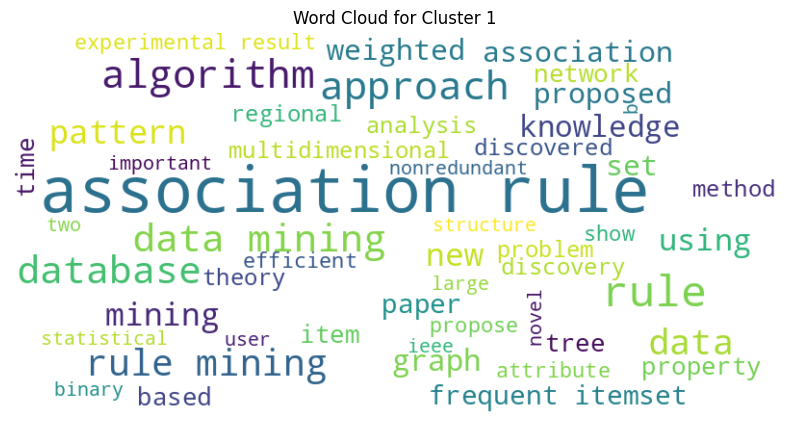

In [12]:
from wordcloud import WordCloud

# Function to plot a word cloud for a cluster
def plot_wordcloud(cluster_data, cluster_label):
    # Combine all text within the cluster
    text = " ".join(cluster_data)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_label}")
    plt.show()

# Generate word clouds for each cluster (excluding noise if any)
for cluster_label in sorted(df['cluster'].unique()):
    if cluster_label != -1:  # Ignore noise
        plot_wordcloud(df[df['cluster'] == cluster_label]['cleaned_text'], cluster_label)


In [13]:
# Randomly sample documents from each cluster to manually check
cluster_0_sample = df[df['cluster'] == 0].sample(5, random_state=1)
cluster_1_sample = df[df['cluster'] == 1].sample(5, random_state=1)

print("Sample documents from Cluster 0:")
print(cluster_0_sample)
print("\nSample documents from Cluster 1:")
print(cluster_1_sample)


Sample documents from Cluster 0:
                                                  text  \
68   Mining Generalized Graph Patterns Based on Use...   
247  Detecting Subdimensional Motifs: An Efficient ...   
381  Private Inference Control for Aggregate Databa...   
482  Organic Pie Charts visualization + organic pie...   
143  Subspace clustering of microarray data based o...   

                                          cleaned_text  cluster  
68   mining generalized graph pattern based user ex...        0  
247  detecting subdimensional motif efficient algor...        0  
381  private inference control aggregate database q...        0  
482  organic pie chart visualization organic pie ch...        0  
143  subspace clustering microarray data based doma...        0  

Sample documents from Cluster 1:
                                                  text  \
104  Multi-Tier Granule Mining for Representations ...   
356  A Novel Rule Weighting Approach in Classificat...   
294  A Novel P

**Word Cloud for Cluster 0: Key Terms( data, mining, algorithm, model, patterns, dataset, clustering, learning, Problem, Method).**

**4 examples to check manually:**

**1- Document 68: Mining Generalized Graph Patterns Based on User Examples.
Focuses on (graph pattern mining and generalization rules).
The proposed solution: Pattern generalization approach.**

**2- Document 247: Detecting Subdimensional Motifs: An Efficient Algorithm for Generalized Multivariate Pattern Discovery.
Focuses on (time series motif discovery).
The proposed solution: Linear-time algorithm, Discovering recurring patterns in time series data is a fundamental problem for temporal data mining.**

**3- Document 381: Private Inference Control for Aggregate Database Queries.
Focuses on ( data privacy and private inference control).
The proposed solution: Aims to ensure that databases can be queried safely without exposing individual data points.**

**4- Document 482: Organic Pie Charts for Data Visualization
Focuses on ( complex data visualization).
The proposed solution: innovative visualization tool (Organic Pie Charts).**

**The sample documents in Cluster 0 focus on the data mining concept, which they have (data mining) as a keyword and data usability with various techniques and algorithms. So Cluster 0 is effectively categorized.**

**Word Cloud for Cluster 1: Key Terms( association, rule, mining, pattern, discovery, algorithm, approach).**

**4 examples to check manually:**

**1- Document 104: Focus on Association and Rule Mining.
Focuses on (multi-tier granule mining).
The proposed solution: it aims to represent complex relationships more efficiently within high-dimensional spaces.**

**2- Document 356: A Novel Rule Weighting Approach in Classification.
Focuses on (Classification Association Rule Mining (CARM)).
The proposed solution: a new rule-weighting mechanism.**

**3- Document 294: A Novel Parallel Boolean Approach for Discovering Frequent Itemsets.
Focuses on ( discovering frequent itemsets).
The proposed solution: Parallel Boolean approach.**

**4- Document 88: Identifying Follow-Correlation Itemset-Pairs.
Focuses on ( follow-correlation itemsets).
The proposed solution: The algorithm for time-series and sequential data mining tasks.**


**The sample documents in Cluster 1 focus on association rule mining, and discovering patterns in complex or multidimensional data. So Cluster 1 is effectively categorized.**



## Evaluation and Insights

In [15]:
from sklearn.metrics import silhouette_score

# Silhouette Score
silhouette_avg = silhouette_score(tfidf_pca, df['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.44032345180811067


**Silhouette Score: 0.44032345180811067
It suggests some ambiguity or overlap between clusters.**

**Insights:
Needs improvements Maybe the parameters or clustering algorithm is not suitable. It may need to try many algorithms or parameters to determine the appropriate solutions for the dataset.**